In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

import xgboost as xgb

## Input data

## Lasso Regularization

In [25]:
# scaler = StandardScaler()
# X_scale = scaler.fit_transform(X)
# # X_testScale = scaler.transform(X_test)

In [26]:
# X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.1, random_state=42)
# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [27]:
# from sklearn.feature_selection import SelectFromModel


# sel_ = LassoCV(alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100], max_iter=10000, cv=5)
# sel_.fit(X_train, y_train)
# print(sel_.score(X_train, y_train))
# print(sel_.score(X_test, y_test))

In [28]:
# np.abs(sel_.coef_)

In [29]:
# selected_feat = X.columns[(sel_.get_support().tolist())]
# print('total features: {}'.format((X.shape[1])))
# print('selected features: {}'.format(len(selected_feat)))
# print('features with coefficients shrank to zero: {}'.format(
#       np.sum(sel_.estimator_.coef_ == 0)))

In [30]:
# removed_feats = X_train.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
# removed_feats

In [31]:
# dfFull = dfFull.drop(removed_feats, axis=1)
# dfFull.shape

In [32]:
# # Train the model with XGBoost
# xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.2,
#                 max_depth = 10, n_estimators = 400)
# xg_reg.fit(X_train, y_train)

# preds = xg_reg.predict(X_train)
# print('Train evaluation')
# print('RMSE: ', '{0:,.0f}'.format(mean_squared_error(y_train, preds, squared=False)))
# print('R2: ',round( r2_score(y_train, preds),3))
# print('-'*20)
# preds = xg_reg.predict(X_test)
# print('Test evaluation')
# print('RMSE: ', '{0:,.0f}'.format(mean_squared_error(y_test, preds, squared=False)))
# print('R2: ',round( r2_score(y_test, preds),3))

## Selected Feature

In [33]:
# df = pd.read_csv('../Dataset/selected_feature.csv')
# df.dropna(inplace=True)
# df.head(2)

In [34]:
# X = df.drop('originalRate', axis=1)
# y = df['originalRate']

In [35]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)
# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [36]:
# sum(y_train)/len(y_train)

In [37]:
# sum(y_test)/len(y_test)

In [38]:
# Train the model with XGBoost
# xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 1, learning_rate = 0.1,
#                 max_depth = 100, n_estimators = 400)
# xg_reg.fit(X_train, y_train)

# print('Train evaluation')
# preds = xg_reg.predict(X_train)
# print('RMSE: ', '{0:,.0f}'.format(mean_squared_error(y_train, preds, squared=False)))
# print('R2: ', round(r2_score(y_train, preds),3))

# preds = xg_reg.predict(X_test)
# print('Test evaluation')
# print('RMSE: ', '{0:,.0f}'.format(mean_squared_error(y_test, preds, squared=False)))
# print('R2: ', round(r2_score(y_test, preds),3))

### Selected features

## Full Feature

In [39]:
dfFull = pd.read_csv('../Dataset/full_feature.csv')
dfFull.dropna(inplace=True)
dfFull.head(2)

,originalRate,size,starRating,AIR_CONDITIONING,BALCONY_TERRACE,BATHROBES,BATHTUB,BLACKOUT_DRAPES_CURTAINS,COFFEE_TEA_MAKER,COMPLIMENTARY_BOTTLED_WATER,...,PARK,HOSPITAL,MUSEUM,GALLERY,PLACE_OF_WORSHIP,TRAIN_STATION,ZOO,ENTERTAINMENT,GARDEN.1,THEATER
0,1227273,46.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,596694,31.0,4.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
X = dfFull.drop('originalRate', axis=1)
y = dfFull['originalRate']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3895, 293) (974, 293) (3895,) (974,)


In [42]:
# Train the model with XGBoost
xg_reg = xgb.XGBRegressor(
    objective ='reg:squarederror',
    eval_metric='rmse'
    )
parameters = {
    'colsample_bytree': 1,
    'gamma': 0.0,
    'learning_rate': 0.01,
    'max_depth': 50,
    'min_child_weight': 3,
    'n_estimators': 400,
    'reg_alpha': 0.0,
    'subsample': 0.7,
    'random_state': 42,
    # 'max_delta_step': 1,
}
    # 'learning_rate': [0.01],
    # 'max_depth': [50],
    # 'n_estimators': [400],
    # 'colsample_bytree': [1],
    # 'min_child_weight': [1, 3, 5],
    # 'gamma': [0.0, 0.1, 0.2],
    # 'subsample': [0.5, 0.7, 1.0],
    # 'reg_alpha': [0.0, 0.1, 0.5],


In [43]:
grid = GridSearchCV(
    xg_reg,
    parameters,
    cv=10,
    n_jobs=-1,
    verbose=3
    )
grid.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False,
                                    eval_metric='rmse', gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_c...
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [1], 'gamma': [0.0, 0.1, 0.2],
                         'learning_rate': [0.01], 'max_depth': [50],
                         'min_child_weight': [1, 3, 5], 'n_estimators': [400],
                         'reg_alpha': [0.0, 0.1, 0.5],
                         'subsample': [0.5, 0.7, 1.0]},
             verbose=3)

In [44]:
grid.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric='rmse', gamma=0.0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=50, max_leaves=0, min_child_weight=3,
             missing=nan, monotone_constraints='()', n_estimators=400, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0.0, reg_lambda=1, ...)

In [51]:
grid.best_params_

{'colsample_bytree': 1,
 'gamma': 0.0,
 'learning_rate': 0.01,
 'max_depth': 50,
 'min_child_weight': 3,
 'n_estimators': 400,
 'reg_alpha': 0.0,
 'subsample': 0.7}

In [45]:

print('Train evaluation')
preds = grid.predict(X_train)
print('RMSE: ', '{0:,.0f}'.format(mean_squared_error(y_train, preds, squared=False)))
print('R2: ', round(r2_score(y_train, preds),3))

preds = grid.predict(X_test)
print('Test evaluation')
print('RMSE: ', '{0:,.0f}'.format(mean_squared_error(y_test, preds, squared=False)))
print('R2: ', round(r2_score(y_test, preds),3))


Train evaluation
RMSE:  915,860
R2:  0.941
Test evaluation
RMSE:  1,949,143
R2:  0.711


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

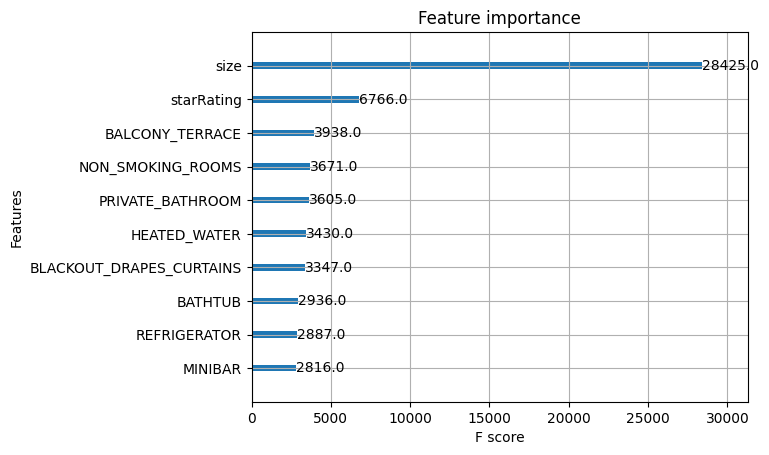

In [52]:
xgb.plot_importance(grid.best_estimator_, max_num_features=10)

In [46]:
grid.feature_importances_

feature_importance = grid.feature_importances_[:5]
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.title('Feature Importance (MDI)')
plt.show()

AttributeError: 'GridSearchCV' object has no attribute 'feature_importances_'